In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_bert = pd.read_csv("df_cbn_bert.csv")

In [6]:
df_bert

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,X..CBN
0,0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,...,0.171215,0.197233,-0.131170,0.210236,-0.728103,0.027258,-0.683708,-0.160281,-0.718498,0.137931
1,0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,...,0.171215,0.197233,-0.131170,0.210236,-0.728103,0.027258,-0.683708,-0.160281,-0.718498,0.137931
2,1,0.227606,0.089886,0.612133,0.085675,0.032208,-0.384907,0.724170,0.154984,-0.061544,...,0.149779,0.157919,-0.156806,0.295726,-0.734769,0.099060,-0.779045,-0.190468,-0.830595,0.137931
3,1,0.227606,0.089886,0.612133,0.085675,0.032208,-0.384907,0.724170,0.154984,-0.061544,...,0.149779,0.157919,-0.156806,0.295726,-0.734769,0.099060,-0.779045,-0.190468,-0.830595,0.137931
4,1,0.227606,0.089886,0.612133,0.085675,0.032208,-0.384907,0.724170,0.154984,-0.061544,...,0.149779,0.157919,-0.156806,0.295726,-0.734769,0.099060,-0.779045,-0.190468,-0.830595,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42972,0.102736,0.135983,0.550969,-0.014671,0.015193,-0.269029,0.679146,0.145063,-0.059002,...,0.252791,0.156139,-0.121033,0.199727,-0.782018,-0.003939,-0.664979,-0.150894,-0.634808,0.103448
74996,42973,0.233248,0.109718,0.598537,0.061358,0.088095,-0.390093,0.800446,0.077057,-0.104278,...,0.195909,0.095593,-0.109210,0.319783,-0.766471,0.119461,-0.819312,-0.167582,-0.830700,0.103448
74997,42974,0.282075,0.149575,0.652933,0.145363,0.003963,-0.429747,0.819131,0.018761,-0.133602,...,0.133490,0.180182,-0.139251,0.378032,-0.731045,0.157516,-0.825618,-0.148141,-0.877954,0.103448
74998,42974,0.282075,0.149575,0.652933,0.145363,0.003963,-0.429747,0.819131,0.018761,-0.133602,...,0.133490,0.180182,-0.139251,0.378032,-0.731045,0.157516,-0.825618,-0.148141,-0.877954,0.103448


In [7]:
df_bert.columns.to_list()

['index',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_

In [8]:
X = df_bert.drop(['X..CBN', 'index'], axis = 1)
y = df_bert[['X..CBN']]

<AxesSubplot:ylabel='Count'>

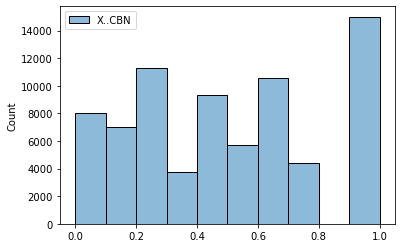

In [9]:
sns.histplot(y, bins = 10)

PCA

In [10]:
pca = PCA()
pca_comps = pca.fit_transform(X)

In [11]:
pca_comps

array([[ 1.71540838e+00, -6.04297809e-01, -2.82348206e-01, ...,
         5.94233384e-04, -3.14546266e-03,  4.56081863e-08],
       [ 1.71540838e+00, -6.04297809e-01, -2.82348206e-01, ...,
         5.94233384e-04, -3.14546266e-03,  4.56081888e-08],
       [-6.79007737e-01, -1.62801665e-01,  4.45363079e-01, ...,
         8.20902555e-04,  6.83867993e-04,  6.14145421e-08],
       ...,
       [-2.51732931e+00,  1.14638917e+00, -9.37950427e-02, ...,
        -1.15654684e-03,  1.55362251e-03, -6.87439466e-08],
       [-2.51732931e+00,  1.14638917e+00, -9.37950427e-02, ...,
        -1.15654684e-03,  1.55362251e-03, -6.87439466e-08],
       [-2.30054569e-01, -3.58354176e-01, -1.17039275e-01, ...,
         1.28426637e-03,  1.98234025e-04,  4.32011702e-08]])

In [12]:
type(pca_comps)

numpy.ndarray

In [13]:
explained_variance = pca.explained_variance_ratio_

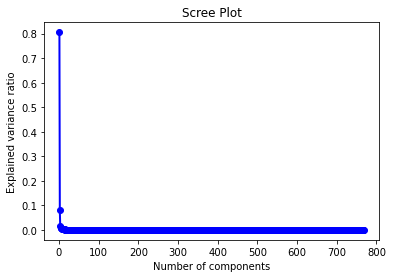

In [14]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [15]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [16]:
n_components_optimal

1

In [17]:
X_reduced = pca.transform(X)[:, :n_components_optimal]

In [18]:
X_reduced

array([[ 1.71540838],
       [ 1.71540838],
       [-0.67900774],
       ...,
       [-2.51732931],
       [-2.51732931],
       [-0.23005457]])

In [19]:
X_reduced = pd.DataFrame(X_reduced)
X_reduced = X_reduced.add_prefix('pca_')
X_reduced

,pca_0
0,1.715408
1,1.715408
2,-0.679008
3,-0.679008
4,-0.679008
...,...
74995,1.566378
74996,-1.608853
74997,-2.517329
74998,-2.517329


train test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, test_size=0.2)

In [21]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

kNN (before feature selection and hyperparameter tuning)

In [22]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [23]:
mean_absolute_error(y_val, y_pred_knreg)

0.07659985761524557

In [24]:
mean_squared_error(y_val, y_pred_knreg)

0.02040657059016121

In [25]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.14285156838537408

In [26]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8853913873276857

In [27]:
#val
r2_score(y_val, y_pred_knreg)

0.7917553731577467

RF (before feature selection and hyperparameter tuning)

In [28]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_3529/2685114911.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [29]:
mean_absolute_error(y_val, y_pred_rfreg)

0.04688745785402654

In [30]:
mean_squared_error(y_val, y_pred_rfreg)

0.012079345262041916

In [31]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.10990607472765969

In [32]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.983918482366767

In [33]:
#val
r2_score(y_val, y_pred_rfreg)

0.8767329015192068

Hyperparameter tuning (kNN)

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7}

kNN (after hyperparameter tuning)

In [38]:
knreg_ht = KNeighborsRegressor(n_neighbors=7, weights='distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [39]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.03648122516811597

In [40]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.011834155193731185

In [41]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.10878490333557862

In [42]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9996485815041909

In [43]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8792350129864522

Hyperparameter tuning (RF)

In [44]:
parameters_rf = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [45]:
rscv_rf = RandomizedSearchCV(rfreg,  
                     parameters_rf,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [46]:
rscv_rf.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/andalanp

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [47]:
rscv_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

RF (after hyperparameter tuning)

In [48]:
rfreg_ht = RandomForestRegressor(n_estimators=100, min_samples_leaf=1, min_samples_split=2, max_features='sqrt', max_depth=50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg_ht = rfreg_ht.predict(X_val)
y_pred_rfreg_ht_r2 = rfreg_ht.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_3529/2242628289.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [49]:
mean_absolute_error(y_val, y_pred_rfreg_ht)

0.047199613747271364

In [50]:
mean_squared_error(y_val, y_pred_rfreg_ht)

0.01214020455215456

In [51]:
mean_squared_error(y_val, y_pred_rfreg_ht, squared = False)

0.11018259641229444

In [52]:
#train
r2_score(y_train1, y_pred_rfreg_ht_r2)

0.9837014027113582

In [53]:
#val
r2_score(y_val, y_pred_rfreg_ht)

0.8761118456635256

Predicting on the test set (kNN)

In [54]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [55]:
import joblib

joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_bert_cbn.pkl")
joblib.dump(y_test, "y_test_knreg_bert_cbn.pkl")

['y_test_knreg_bert_cbn.pkl']

In [56]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03341735994348315

In [57]:
mean_squared_error(y_test, y_pred_knreg_test)

0.010536626489339854

In [58]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.10264807104539204

In [59]:
r2_score(y_test, y_pred_knreg_test)

0.893230215814658

Error analysis (kNN)

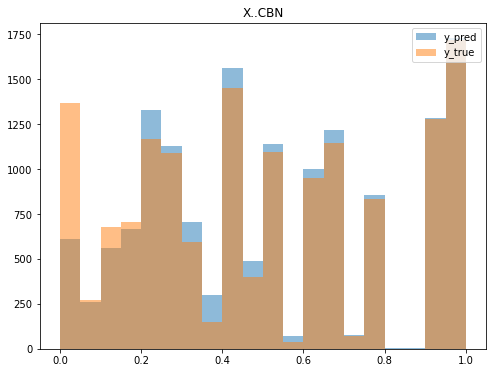

<Figure size 432x288 with 0 Axes>

In [60]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBN"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_bert_cbn.png')

Pearson R (kNN)

In [61]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.948
P-value: 0.000


Predicting on the test set (RF)

In [62]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [63]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_bert_cbn.pkl")
joblib.dump(y_test, "y_test_rfreg_bert_cbn.pkl")

['y_test_rfreg_bert_cbn.pkl']

In [64]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.04488490602091993

In [65]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.011123250764580794

In [66]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.10546682305152077

In [67]:
r2_score(y_test, y_pred_rfreg_test)

0.8872858324459654

Error analysis (RF)

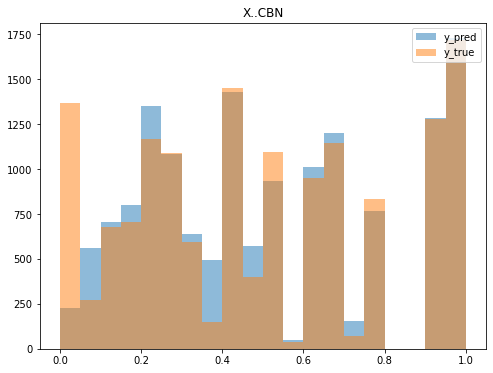

<Figure size 432x288 with 0 Axes>

In [68]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBN"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_bert_cbn.png')

Pearson R (RF)

In [69]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.944
P-value: 0.000
